<a href="https://colab.research.google.com/github/vachkim/PROJECT/blob/master/Pro_%EB%B9%84%EB%8C%80%EB%A9%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
ROOT = '/content/drive'
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

### 0.키워드 분석의 목적
- 네이버 뉴스기사를 바탕으로 '비대면' 키워드와 관련된 텍스트들을 분석한다
- 빈도분석을 통해 비대면으로의 전환이 어떤 변화를 가져왔는지 파악하는 것을 목표로 한다

### 1.뉴스 빈도 확인
- 지난 한 달의 기간 동안 '비대면'을 키워드로 한 뉴스 기사의 발행 수를 확인해보자

In [ ]:
url = 'https://search.naver.com/search.naver?&where=news&query=%EB%B9%84%EB%8C%80%EB%A9%B4&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=2&ds=2020.08.12&de=2020.09.11&docid=&nso=so:r,p:1m,a:all&mynews=0&cluster_rank=31&start={}&refresh_start=0'
date = []
for i in range(1,80000,10):
  URL = url.format(i)
  page = requests.get(URL)
  soup = bs(page.text, 'html.parser')
  all = soup.find('ul', class_='type01')
  news = all.find_all('li')

  for item in news:
    a = item.find ('dd', {'class':'txt_inline'})
    if a is not None:
      date.append(a.text)

In [ ]:
date

### 2.뉴스 크롤링
- '비대면'을 검색하여 나오는 네이버 뉴스 중 기간을 일주일로 제한하여 제목과 본문의 일부 내용을 크롤링해보자

#### 1) 모듈 설치 및 URL 설정
- 크롤링에 사용할 모듈을 설치하고
- 뉴스 URL을 입력값으로 넣어준다

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
URL = 'https://search.naver.com/search.naver?&where=news&query=%EB%B9%84%EB%8C%80%EB%A9%B4&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=1&ds=2020.09.04&de=2020.09.11&docid=&nso=so:r,p:1w,a:all&mynews=0&cluster_rank=30&start=1&refresh_start=0'

#### 2) 제목 크롤링

In [ ]:
page = requests.get(URL)
soup = bs(page.text, 'html.parser')
all = soup.find('ul', class_='type01')
news = all.find_all('li')

In [ ]:
title = []
for item in news:
   a = item.find('a',{'class':'_sp_each_title'})
   if a is not None:
     title.append(a.text)
title

["KT, '패스앱+계좌인증'으로 휴대폰 비대면 개통 나선다",
 '한전KDN, 비대면 원격 감사기법 도입',
 '대학 10곳 중 6곳, 2학기 전면 비대면 수업 중',
 '우리은행, 카카오페이와 비대면 대출 등 협력',
 '공인인증서 없이 비대면 휴대폰 개통',
 '경북대, 비대면 수업 한 달 추가 연장',
 '우리은행x카카오페이 "비대면 신규 서비스 공동 개발"',
 '울산시, 중소기업 비대면 수출마케팅 지원',
 "경기도, '체외진단의료기기' 비대면 세미나 개최",
 "BBQ, 비대면 트렌드 겨냥 '추석 선물세트' 출시"]

#### 3) 요약문 크롤링

In [ ]:
page = requests.get(URL)
soup = bs(page.text, 'html.parser')
all = soup.find('ul', class_='type01')
news = all.find_all('li')

In [ ]:
content =[]
for item in news:
  a = item.find_all('dd')
  if a is not None:
    try :
      content.append(a[1].text)
    except:
      continue
content

["현재 비대면으로 이동통신 서비스에 가입하기 위해서는 범용공인인증서 또는 신용카드 인증을 통한... 이후 7월 과학기술정보통신부의 심사를 거쳐 '비대면 이동통신 가입 서비스' 임시 허가를 받았다. 이는 통신사...",
 '한전KDN(사장 박성철)은 코로나19 확산에 대응하고 정부의 사회적 거리두기 정책을 적극 이행하기 위해 비대면(언택트) 감사기법을 도입했다고 10일 밝혔다. 비대면 감사기법은 이 회사가 자체 개발한 청백e...',
 '전면 비대면 수업을 하고 있는 것으로 조사됐습니다. 교육부에 따르면 지난 7일 기준 전국 대학과 전문대학 332개 학교 가운데 59%인 196개 학교가 2학기 개강 이후 전면 비대면 수업을 진행하고 있습니다. 이는...',
 "협약에 따라 두 회사는 '공개 응용프로그램 개발환경'(Open API) 연동을 통한 비대면 대출 신청, 고객 맞춤... 우리은행 비대면 대출상품 정보가 제공된다. 금융소비자는 여기에서 우리은행 비대면 대출상품의 한도와 금리를...",
 "현재 비대면으로 이동통신 서비스에 가입하기 위해서는 범용공인인증서 또는 신용카드 인증을 통한... 이후 7월 과학기술정보통신부 심사를 거쳐 '비대면 이동통신 가입 서비스' 임시 허가를 받았다. 이는 통신사...",
 '경북대의 비대면 강의가 다음 달 17일까지로 한 달 더 연장됐다. 그러나, 2학기 개강 4주차인 오는 21일부터... 같이 비대면 강의로 진행한다. 35명 초과 70명 이하 수업은 학장 자율 결정으로 혼합 또는 비대면 강의로...',
 '양사는 이번 협약을 통해 금융과 플랫폼 기술로\xa0▲Open API\xa0연동을 통한 비대면 대출 신청 ▲고객 맞춤... 우리은행 비대면 대출상품을 제공한다.\xa0이를 통해 우리은행 비대면 대출상품의 한도와 금리를 조회한 후...',
 '울산시는 코로나19로 침체된 중소기업의 해외판로 확보를 위해 해외 마케팅을 전면 비대면으로 전환해... 실시간 비대면 온라인 방식으로 진행할 예정이다. 이번 비대면 수출상담회에는 총 5

- 위 과정을 기간 내 모든 뉴스 페이지에서 가능하도록 URL에 포맷을 적용한다

`https://search.naver.com/search.naver?&where=news&query=%EC%A7%91%EC%BD%95&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=1&ds=2020.09.03&de=2020.09.10&docid=&nso=so:r,p:1w,a:all&mynews=0&cluster_rank=30&start=11&refresh_start=0`

- 위에서 start뒤에 오는 값이 페이지(시작하는 뉴스의 인덱스)이므로 여기에 값을 부여하기로 한다

In [ ]:
url = 'https://search.naver.com/search.naver?&where=news&query=%EB%B9%84%EB%8C%80%EB%A9%B4&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=1&ds=2020.09.04&de=2020.09.11&docid=&nso=so:r,p:1w,a:all&mynews=0&cluster_rank=29&start={}&refresh_start=0'
title = []
content = []
for i in range(1,24000,10):
  URL = url.format(i)
  page = requests.get(URL)
  soup = bs(page.text, 'html.parser')
  all = soup.find('ul', class_='type01')
  news = all.find_all('li')

  for item in news:
    a = item.find('a',{'class':'_sp_each_title'})
    if a is not None:
      title.append(a.text)
  for item in news:
    a = item.find_all('dd')
    if a is not None:
      try :
        content.append(a[1].text)
      except:
        continue

- 다음과 같이 크롤링 된 것을 확인할 수 있다

In [ ]:
title

["KT, '패스앱+계좌인증'으로 휴대폰 비대면 개통 나선다",
 '한전KDN, 비대면 원격 감사기법 도입',
 '대학 10곳 중 6곳, 2학기 전면 비대면 수업 중',
 '우리은행, 카카오페이와 비대면 대출 등 협력',
 '공인인증서 없이 비대면 휴대폰 개통',
 '경북대, 비대면 수업 한 달 추가 연장',
 '우리은행x카카오페이 "비대면 신규 서비스 공동 개발"',
 '울산시, 중소기업 비대면 수출마케팅 지원',
 "경기도, '체외진단의료기기' 비대면 세미나 개최",
 "BBQ, 비대면 트렌드 겨냥 '추석 선물세트' 출시",
 '울산시, 중소기업 비대면 수출마케팅 지원',
 '경기도 14~25일 체외진단 의료기기 관련 비대면 세미나',
 '당청 “비대면 급증…13살 이상 전국민에 통신비 2만원 지급”',
 'KT-전국기초단체장, 비대면 공공서비스 혁신 추진',
 '제66회 백제문화제 ‘비대면’ 으로 개최',
 'LG유플러스, 초등생 비대면 교육 위한 ‘U+초등나라’ 출시',
 '코로나19로 수산물 수출 감소…비대면 마케팅 지원 확대',
 '삼성·KT·네이버 등 하반기 신입공채 비대면이 대세',
 '하하·김종국·양세찬 등, 오늘 한국·필리핀 팬들과 비대면 팬미팅',
 'NHN·NIA, 비대면 화상 솔루션 이용 활성화 MOU',
 'SBS 비대면 슈퍼콘서트에 몬스타엑스·세븐틴 출연',
 '고려대 교수 코로나19 확진…병상서 비대면 수업 예정(종합)',
 "풀무원 올가홀푸드, '추석 선물세트' 비대면 판매 확대",
 '삼성물산 수트서플라이, 비대면 서비스 강화',
 "'2020 신진국악실험무대'도 비대면으로",
 '지니언스, 비대면 방식으로 아태지역 5개국·10여개 고객 확보',
 '방역당국, 비대면 종교행사 3407건 지원…"안전한 종교활동 지속"',
 '김범룡, 19일 비대면 콘서트 개최',
 'aT, 언택트시대 6개 해외지사 대상 비대면 감사 첫 도입',
 "LGU+, 비대면 교육콘텐츠 늘린다…'U+초등나라' 출시(종합)",
 '[일문일답]"최고 비대면 교

In [ ]:
content

["현재 비대면으로 이동통신 서비스에 가입하기 위해서는 범용공인인증서 또는 신용카드 인증을 통한... 이후 7월 과학기술정보통신부의 심사를 거쳐 '비대면 이동통신 가입 서비스' 임시 허가를 받았다. 이는 통신사...",
 '한전KDN(사장 박성철)은 코로나19 확산에 대응하고 정부의 사회적 거리두기 정책을 적극 이행하기 위해 비대면(언택트) 감사기법을 도입했다고 10일 밝혔다. 비대면 감사기법은 이 회사가 자체 개발한 청백e...',
 '전면 비대면 수업을 하고 있는 것으로 조사됐습니다. 교육부에 따르면 지난 7일 기준 전국 대학과 전문대학 332개 학교 가운데 59%인 196개 학교가 2학기 개강 이후 전면 비대면 수업을 진행하고 있습니다. 이는...',
 "협약에 따라 두 회사는 '공개 응용프로그램 개발환경'(Open API) 연동을 통한 비대면 대출 신청, 고객 맞춤... 우리은행 비대면 대출상품 정보가 제공된다. 금융소비자는 여기에서 우리은행 비대면 대출상품의 한도와 금리를...",
 "현재 비대면으로 이동통신 서비스에 가입하기 위해서는 범용공인인증서 또는 신용카드 인증을 통한... 이후 7월 과학기술정보통신부 심사를 거쳐 '비대면 이동통신 가입 서비스' 임시 허가를 받았다. 이는 통신사...",
 '경북대의 비대면 강의가 다음 달 17일까지로 한 달 더 연장됐다. 그러나, 2학기 개강 4주차인 오는 21일부터... 같이 비대면 강의로 진행한다. 35명 초과 70명 이하 수업은 학장 자율 결정으로 혼합 또는 비대면 강의로...',
 '양사는 이번 협약을 통해 금융과 플랫폼 기술로\xa0▲Open API\xa0연동을 통한 비대면 대출 신청 ▲고객 맞춤... 우리은행 비대면 대출상품을 제공한다.\xa0이를 통해 우리은행 비대면 대출상품의 한도와 금리를 조회한 후...',
 '울산시는 코로나19로 침체된 중소기업의 해외판로 확보를 위해 해외 마케팅을 전면 비대면으로 전환해... 실시간 비대면 온라인 방식으로 진행할 예정이다. 이번 비대면 수출상담회에는 총 5

In [ ]:
# title_copy = title.copy()
# content_copy = content.copy()

### 3.빈도분석 및 시각화
- 크롤링한 데이터를 바탕으로 빈도분석을 시행, 키워드와 관련된 인사이트를 도출한다

In [ ]:
!pip install konlpy
from konlpy.tag import Okt
okt = Okt()

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 3.8MB 41.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


#### 1) 텍스트 전처리
- 빈도 분석을 수행하기 위해 토큰화 및 불용어 처리 작업을 수행한다

In [ ]:
news_title =[]
for item in title:
  item = item.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
  news_title.append(item)

In [ ]:
stopPos = ['Determiner','Conjunction','Exclamation','Josa','PreEomi','Eomi',
           'Suffix','Punctuation','Foreign','Alpha','Number','Unknown','KoreanParticle']

In [ ]:
stopWord = ['곳','중','울','전','회','오다','제','차','하하','김종국','양세찬','등',
            '과','공','방','헛','확','하다','은','는','이','가','다','폐','로','비대','세',
            '정','당','문','시','기','콘','보','신','농','물','산','말','생','국','우아하다',
            '달','지','임','채다','레이','나선','명','비','대면','위']

In [ ]:
X = []
for item in news_title:
  temp_X = []
  temp_X = okt.pos(item, stem=True)
  temp_X = [word[0] for word in temp_X if not word[1] in stopPos]
  temp_X = [word for word in temp_X if not word in stopWord]
  X.append(temp_X)

In [ ]:
X[:3]

[['패스', '앱', '계좌', '인증', '휴대폰', '개통', '나서다'],
 ['한전', '원격', '감사', '기법', '도입'],
 ['대학', '학기', '전면', '수업']]

In [ ]:
non_list = []
for sentence in X:
  for token in sentence:
    non_list.append(token)

In [ ]:
from collections import Counter
counting = Counter(non_list).most_common()

In [ ]:
word = []
count_num = []
for item in counting:
  word.append(item[0])
  count_num.append(item[1])

In [ ]:
import pandas as pd
from pandas import DataFrame
data = {'word':word,'counting':count_num}
DF = DataFrame(data)
DF.head(20)

,word,counting
0,온라인,3689
1,교육,2729
2,서비스,2370
3,지원,1788
4,카카오,1668
5,시대,1666
6,디지털,1634
7,수업,1509
8,상담,1445
9,인천,1409


#### 2) 시각화 진행

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
count_data = dict(zip(DF['word'].tolist(), DF['counting'].tolist()))
count_data

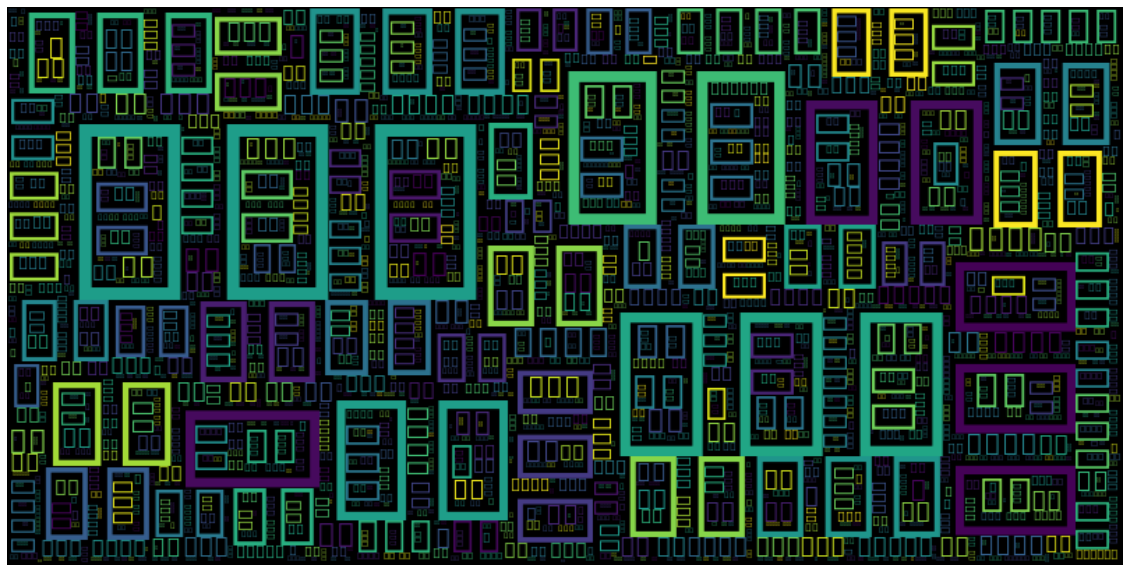

In [ ]:
wc = WordCloud(width=800, height=400, max_words=2000).generate_from_frequencies(count_data)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()